# Deep Unfolding approaches

The aim of this notebook is to present an example of the use of one of our models based on Deep Unfolding Learning, which is the `SORNet`, and to compare it with its `SOR` counterpart, which is based on the conventional approach.

For more details about these approaches see this [add a link](#)

We start by importing everything we need: 
- From `unfolding_linear.utils` we import device to indicate where we're going to run our program (cpu or gpu), and `generate_A_H_sol` to generate a $Ax=b$ problem with random matrices of a size we define.
- From `unfolding_linear.train_methods` we import the model we want to evaluate (`SORNet`) as well as the function for training it (`train_model`) and evaluating it (`evaluate_model`).
- From `unfolding_linear_.methods` we import its equivalent using a classic iterative approach (`SOR`)

In [1]:
from unfolding_linear.utils import device, generate_A_H_sol
import matplotlib.pyplot as plt

from unfolding_linear.train_methods import train_model, evaluate_model, SORNet
from unfolding_linear.methods import model_iterations, SOR

from torch import nn
import torch.optim as optim

Code run on : cpu


In [2]:
total_itr = 5  # Total number of iterations (multiple of "itr")
n = 300  # Number of rows 
m = 600  # Number of columns 
seed = 12 # Seed for the random generator
bs = 10000  # Mini-batch size (samples)
num_batch = 500  # Number of mini-batches
lr_adam = 0.002  # Learning rate of optimizer
init_val_SORNet = 1.1  # Initial value of omega for SORNet

A, H, W, solution, y = generate_A_H_sol(n=n, m=m, seed=seed, bs=bs)


    - Condition number of A: 30.8287524750237 
    - Min eigenvalue of A: 0.18419073567986696
    - Max eigenvalue of A: 5.678370598467135


### Deep Unfolding model

In [4]:
# SORNet model
model_SorNet = SORNet(A, H, bs, y, init_val_SORNet, device=device)

# Loss function and Optimizer
loss_func = nn.MSELoss()
opt_SORNet = optim.Adam(model_SorNet.parameters(), lr=lr_adam)

In [5]:
trained_model_SorNet, loss_gen_SORNet = train_model(model_SorNet, opt_SORNet, loss_func, solution, total_itr, num_batch)

generation: 1  batch: 0 	 MSE loss: 0.21334302425384521
generation: 1  batch: 200 	 MSE loss: 0.1630953699350357
generation: 1  batch: 400 	 MSE loss: 0.15578413009643555
generation: 2  batch: 0 	 MSE loss: 0.0960206538438797
generation: 2  batch: 200 	 MSE loss: 0.09163513779640198
generation: 2  batch: 400 	 MSE loss: 0.08557206392288208
generation: 3  batch: 0 	 MSE loss: 0.044734131544828415
generation: 3  batch: 200 	 MSE loss: 0.03437157720327377
generation: 3  batch: 400 	 MSE loss: 0.03350122272968292
generation: 4  batch: 0 	 MSE loss: 0.014199895784258842
generation: 4  batch: 200 	 MSE loss: 0.01315866969525814
generation: 4  batch: 400 	 MSE loss: 0.01315866969525814
generation: 5  batch: 0 	 MSE loss: 0.005174018908292055
generation: 5  batch: 200 	 MSE loss: 0.005009068176150322
generation: 5  batch: 400 	 MSE loss: 0.005009067710489035


In [6]:
norm_list_SORNet = evaluate_model(trained_model_SorNet, solution, n, bs, total_itr, device=device)

### Conventional approach

In [7]:
SOR_model = SOR(n = n, A = A, H = H, bs = bs, y = y, omega = 1.8)

In [8]:
s_hat_SOR, norm_list_SOR = model_iterations(total_itr = total_itr, n = n, bs = bs, model = SOR_model, solution = solution)

## Performances comparison

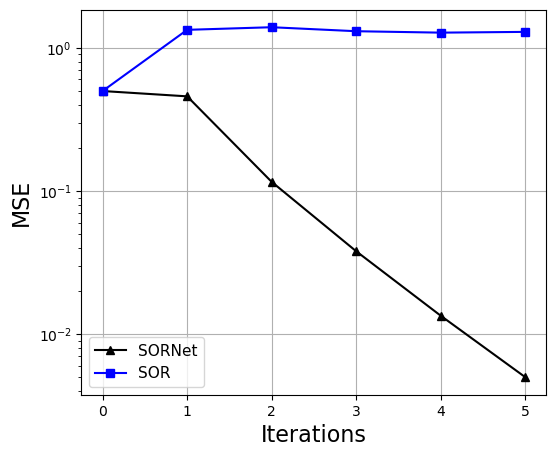

In [9]:
norm_list = [norm_list_SORNet, norm_list_SOR]
methods = ["SORNet", "SOR"]
marker_list = ['^k-', 'sb-']

itr_list = list(range(total_itr + 1))
plt.figure(figsize=(6,5))
for k, iterative in enumerate(norm_list):
    plt.semilogy(itr_list, iterative, marker_list[k], label=methods[k])
    plt.grid("True")
plt.legend(fontsize=11)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.yscale('log')
plt.show()